In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils import data
from matplotlib import pyplot as plt

In [6]:
def load_data_fashion_mnist(batch_size,resize=None):
    trans = transforms.Compose([transforms.ToTensor()])
    mnist_train = torchvision.datasets.FashionMNIST(root='../data', train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root='../data', train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True),
            data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False))

def get_fashion_mnist_lable(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.module = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
    def forward(self, x):
        x =x.view(-1, 28*28)
        return self.module(x)

In [35]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = Net().to(device)
criterion = nn.CrossEntropyLoss().to(device)
lr = 0.01
optimizer = optim.SGD(net.parameters(),lr)

train_iter,test_iter = load_data_fashion_mnist(batch_size=128)
net = net.train()

#训练次数
total_train_step = 0
nums_epoch = 10

train_losses = []
train_accuracies = []
test_accuracies = []
for i in range(nums_epoch):
    print("---------第{}轮训练开始---------".format(i + 1))
    train_loss = 0
    train_acc = 0
    train_step = 0
    for img,label in train_iter:
        img = img.reshape(-1,28*28).to(device)
        label = label.to(device)
        out = net(img)
        train_step += 1
        loss = criterion(out,label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct/img.shape[0]
        train_acc += num_correct
        if train_step % 200 == 0:
            print('[INFO] Epoch-{}-Batch-{}: Train:Loss-{:.4f},Accuracy-{:.4f}'.format(i + 1,train_step,loss.item(),acc))
    train_losses.append(train_loss/len(train_iter))
    train_accuracies.append(train_acc/len(train_iter))
    eval_loss = 0
    eval_acc = 0
    with torch.no_grad():
        for img,label in test_iter:
            img = img.reshape(-1,28*28).to(device)
            label = label.to(device)
            out = net(img)
            loss = criterion(out,label)
            eval_loss += loss.item()
            _, pred = out.max(1)
            num_correct = (pred == label).sum().item()
            acc = num_correct/img.shape[0]
            eval_acc += acc
        test_accuracies.append(eval_acc/len(test_iter))
        print('[INFO] Epoch-{}: Train: Loss-{:.4f}, Accuracy-{:.4f} | Test: Loss-{:.4f}, Accuracy-{:.4f}'.format(
        i + 1, train_loss / len(train_iter), train_acc / len(train_iter), eval_loss / len(test_iter),
        eval_acc / len(test_iter)))


---------第1轮训练开始---------
[INFO] Epoch-1-Batch-200: Train:Loss-2.2465,Accuracy-0.3125
[INFO] Epoch-1-Batch-400: Train:Loss-2.0672,Accuracy-0.2344
[INFO] Epoch-1: Train: Loss-2.1960, Accuracy-0.2186 | Test: Loss-1.9182, Accuracy-0.2356
---------第2轮训练开始---------
[INFO] Epoch-2-Batch-200: Train:Loss-1.3656,Accuracy-0.5859
[INFO] Epoch-2-Batch-400: Train:Loss-1.0861,Accuracy-0.5703
[INFO] Epoch-2: Train: Loss-1.3803, Accuracy-0.5255 | Test: Loss-1.0238, Accuracy-0.5938
---------第3轮训练开始---------
[INFO] Epoch-3-Batch-200: Train:Loss-0.9369,Accuracy-0.6250
[INFO] Epoch-3-Batch-400: Train:Loss-0.8207,Accuracy-0.6562
[INFO] Epoch-3: Train: Loss-0.8887, Accuracy-0.6603 | Test: Loss-0.8177, Accuracy-0.6874
---------第4轮训练开始---------
[INFO] Epoch-4-Batch-200: Train:Loss-0.7304,Accuracy-0.7109
[INFO] Epoch-4-Batch-400: Train:Loss-0.7143,Accuracy-0.7500
[INFO] Epoch-4: Train: Loss-0.7608, Accuracy-0.7152 | Test: Loss-0.7310, Accuracy-0.7293
---------第5轮训练开始---------
[INFO] Epoch-5-Batch-200: Train:Lo

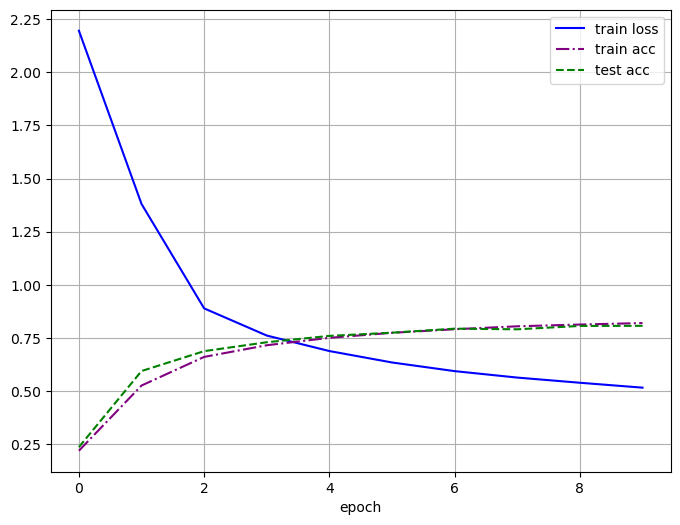

In [36]:
import matplotlib.pyplot as plt

# 示例数据
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_loss = [0.82, 0.74, 0.68, 0.64, 0.61, 0.59, 0.57, 0.55, 0.53, 0.52]
train_acc = [0.81, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.89, 0.9]
test_acc = [0.78, 0.79, 0.8, 0.81, 0.82, 0.82, 0.83, 0.84, 0.85, 0.85]

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.plot( train_losses, label='train loss', color='blue')
plt.plot( train_accuracies, label='train acc', linestyle='-.', color='purple')
plt.plot( test_accuracies, label='test acc', linestyle='--', color='green')

# 添加标题和标签
# plt.title('Training Process')
plt.xlabel('epoch')
# plt.ylabel('value')
plt.legend()

# 显示网格
plt.grid(True)

# 显示图形
plt.show()


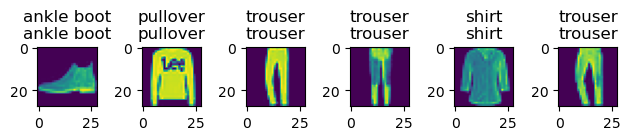

In [72]:
for img,label in test_iter:
    img = img.reshape(-1,28*28).to(device)
    label = label.to(device)
    break
trues = get_fashion_mnist_lable(label[0:6])
preds = get_fashion_mnist_lable(net(img)[0:6].max(1)[1])
titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
img = img[0:6].reshape(6,28,28).to("cpu").numpy()

for i in range(6):
    ax = plt.subplot(1,6,i+1)
    ax.imshow(img[i])
    ax.set_title(titles[i])
plt.tight_layout()
plt.show()